<a href="https://colab.research.google.com/github/AXM78251/Python_ML/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TensorFlow Core Learning Algorithms**
***
This notebook will cover 4 of the most fundamental machine learning algorithms. This notebook will apply these algorithms to unique problems and datasets and explain the uses for each. <br><br>
These four algorithms include:


*   Linear Regression
*   Classification
*   Clustering
*   Hidden Markov Models




# **Linear Regression**
***
One of the most basic forms of machine learning and is used to predict numeric values -- tries to form a linear correspondence between data points<br><br>

Common examples of linear regression involve only working with 2 dimensions but we certainly do this in higher dimensions as well where we have 8 or 9 input variables and 1 output variable we are predicting<br><br>

So long as our data points are correlated linearly in three dimensions, we can still do this<br><br>

# How it Works
***
***Key concept: If data points are labeled linearly, then we can generate a line of best fit for these points and use it to predict future values***<br><br>

Example in 2 dimensions below<br><br>

(0.0, 6.0, 0.0, 20.0)

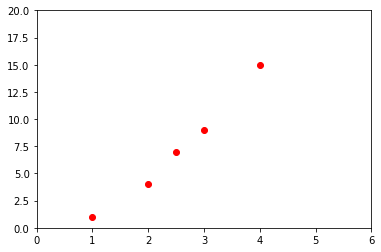

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

For some unique dataset, we want to come up with a model that can give us some good predictions for our data points
<br><br>
For the scenario above, we want to predict a reasonable y value given some x value for a data point, we see some linear correspondence between the data points, so we can draw a line of best fit that best expresses the relationship between these points

Below is an example of a line of best fit for the above dataset

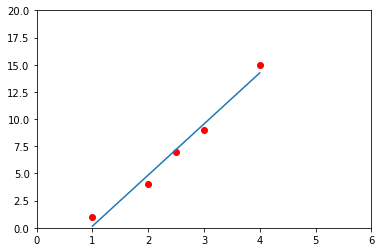

In [ ]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

Once we generate the line of best fit, we can use it to predict future values in our dataset!!

# **Setup and Imports**
***

Before doing anything else install the following:

In [ ]:
!pip install -q sklearn

In [ ]:
%tensorflow_version 2.x # Required at the beginning of every notebook

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

# **Explanation of Imports:** 
***


*   ***numpy*** -- a very optimized version of arrays in Python, allows us to do multi dimensional calculations
*   ***pandas*** -- a data analytics tool, allows us to very easily manipulate datawhere that is loading in datasets, viewing datasets, cutting off specific rows/columns, etc
* ***matplotlib.pyplot*** -- allows us visualizations of graphs and charts
* ***clear_output*** -- specific for this notebook, just used to clear the output
* ***urllib*** -- "six" package allows us to write code that is compatible with both Python 2 and Python 3
* ***tensor.compat.v2.feature_column*** -- we need something called a feature column when we create a linear regression algorithm/model in TensorFlow



# ***Data***
***
One of the most important parts of machine learning is data! For this linear regression model, we'll be using the titanic dataset. It has information about each passenger on the ship and using this dataset, we will aim to predict who will survive (or likelihood someone will survive) given a bunch of information <br><br>

***IMPORTANT***: always make sure to understand the data and exploring it before doing anything else<br><br>

**Below we will load in the dataset and learn how we can explore it using built in tools**

In [ ]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # Training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # Testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

When we have data, such as dataset above, we don't necessarily know what kind of correlations there might be, but we can kind of assume there is some linear thing we are looking for, some kind of pattern, for this reason it is important to explore our data before doing anything else

If we look above, we have two datasets:


*   Training dataset
*   Testing dataset

**Training datasets** will be used to train our model <br>
**Testing dataset** will be used to test out our model after we have finished training it<br><br>
The reason we do this is because when we train our model for accuracy to see how well it is doing, it doesn't make sense to test it on data it has already seen, so therefore we need fresh data which is given to us by our **testing dataset**





For the dataset above, pd.read_csv() will return to us a new pandas dataframe, which allows us to view our data in a nice form similar to a table<br><br>
We can "pop" out a column as done above where we have popped out the "survived" column from our dataset to store it in a new variable and this column will simply let us know whether the person survived or not<br><br>
We can use the .head() method to look at the first 5 items/entries in our dataframe and that is what we do below

In [ ]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


Some useful tips for working with dataframes:

*   dataset.loc[x] - will give us one specific row in our dataframe
*   dataset['column_n'] to get/reference a specific column







To get a more statistical analysis of our data we can use the .describe() method

In [ ]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


We can also get the shape of our dataset dataframe

In [ ]:
dftrain.shape

(627, 9)

So we have 627 rows/entries and 9 columns/features!

Now let's go ahead and look at our survival information

In [ ]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

**Visuals are always valuable, let's generate a few graphs of the data**

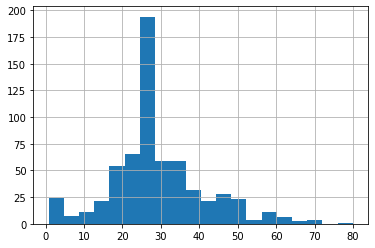

In [ ]:
dftrain.age.hist(bins = 20)

The above will generate a histogram of the age of the people in the titanic

As seen above, we see most passengers were in their late 20s, and this good information to know as it allows us to introduce a bit of bias into our linear correlation graph<br>
<br>

**Now let's look at the genders of our passengers, we will put it in the form of a bar graph **

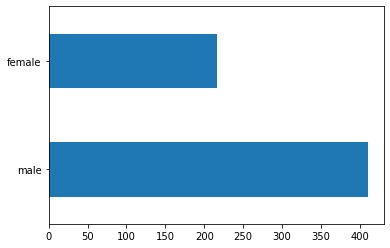

In [ ]:
dftrain.sex.value_counts().plot(kind='barh')

**Now lets look at the class of our passengers**

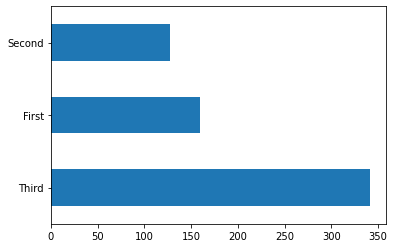

In [ ]:
dftrain['class'].value_counts().plot(kind='barh')

Lastly let's look at the percentage of survival by sex

Text(0.5, 0, '% survive')

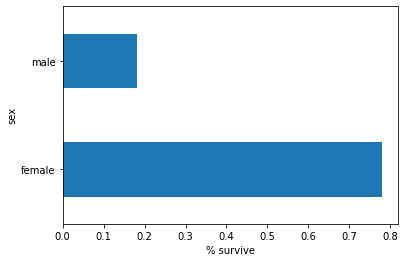

In [ ]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

After analysis of the data, we can extract the following data:


*   Most passengers are in their 20s or 30s
*   Most passengers are male
*   Most passengers are in "third" class
* Females have a higher chance of survival 



# **Training vs Testing Data**
***
Above, we loaded in **two different datasets**


*   Training dataset
*   Testing dataset

The **training** dataset is what we feed into our model so that it can develop and learn from the data, usually much larger (i.e. more entries) than the testing data
<br><br>
The **testing** data is used to evaluate the model and see how well it is responding, must use a separate set of data that the model has not been trained on



In [ ]:
dftrain.shape

(627, 9)

In [ ]:
dfeval.shape

(264, 9)

# **Categorical vs Numeric data**
***
Categorical data:


*   Something that is not numeric, but have a set of different categories for a possible value
*   Must find a way to transform it into numbers somehow 
*   We encode the data using integer values, we do this because our model doesn't care what class/category the data falls under, it just needs to know whether the values are the same or different
* When encoding, make sure all data of a certain class have the same value (consistency)

Numeric data:


*   Anything that has an integer/float value





# **Feature Columns**
***
*** As the previous section explained, we have two different kinds of information:
**Categorical and Numeric**<br><br>
**Categorical data** is anything that is not numerical. An example is our "sex" column which rather than using numeric values, it uses words such as "male" or "female" <br><br>
Before creating/training our model, we must convert our categorical data into numeric data<br><br>

As far as **feature columns** go, they are nothing special, they are just what we need to feed into our model to actually make predictions

**We will now separate our columns into categorical columns and numeric columns**

In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

For an explanation of the above code block, we loop through each feature name in the categorical columns, and for each feature name we:


*   Define a vocabulary which is equal to the data frame at that feature name and get all of the different unique values
  * The .unique() method will get a list of all unique values at the specified feature column

*   Now we append to the feature_columns list, a categorical column with in-memory vocabulary generated by TensorFlow

We need to create these columns (in the form of a numpy array kind of) that have the feature name as we as all the different vocabulary/entries associated with it so that we can create our model using these columns since our model needs to know the different columns we'll be using as well as all the different entries that can go in that column and also whether the column is categorical or numerical



# **The Training Process**
***
The way we train our model is by feeding it information (our inputs/features)<br><br>
For this specific model, data will be streamed into it in small batches of 32. We will not feed the entire dataset to our model at once, but simply small batches of entries, and we will feed these batches to our model multiplr times according to the number of **epochs**<br><br>
An **epoch** is simply one stream of our entire dataset, the number of epochs we define is the amount of times our model will see the entire dataset. We use multiple epochs in hope that after seeing the same data multiple times the model will better determine how to estimate it, but just be careful not to **overfit** our data <br><br>
Because we feed our data in batches and multiple times, we need to create something called the **input function** which will define how the data will be converted into batches at each epoch

# **Input Function**
*** 
Our input function is the way that we define how our data is going to be broken into epochs and into batches to feed to our model<br><br>

The TensorFlow model requires that the data passed in comes in as a tf.data.Dataset object and to do this, we then need an *input function* that can covert our pandas dataframe into that object


In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # Inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # Create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # Randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # Split dataset into batches of 32 and repeat process for number of epochs
    return ds  # Return a batch of the dataset
  return input_function  # Return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # Here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)  #Shuffle = False and num_epochs = 1 because we are no longer training the data


The above code block takes our data and encodes it in a tf.data.Dataset object

**Useful tip**:


*   train_input_fn() will actually call the input function that we just created



# **Creating the Model**
***
Here, we will be using a linear estimator to utilize the linear regression algorithm<br><br>
We will be passing in the feature columns we created earlier


In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier

# **Training the Data**
***
To train our model, we simply pass in the input function we created earlier 

In [ ]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on testing data

clear_output()  # clears console output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model
print(result)

0.7765151
{'accuracy': 0.7765151, 'accuracy_baseline': 0.625, 'auc': 0.8360269, 'auc_precision_recall': 0.7981975, 'average_loss': 0.4718465, 'label/mean': 0.375, 'loss': 0.45976946, 'precision': 0.6960784, 'prediction/mean': 0.41023365, 'recall': 0.7171717, 'global_step': 600}


Above, we pass in the input function we created earlier into our linear estimator<br><br>

Our linear estimator will then use the input function to grab all the data it needs to train the model <br>

Now for our result, rather than train, it will evaluate our model<br>

Clear_output() will clear our console output as there will be some output while we're training<br>

Lastly, we will print the accuracy of this linear regression model

As can be seen above the accuracy of our model hovers arond 77% which is not great but decent for our first time, we can certainly improve it though!<br><br>
Since our goal is to ultimatelt get our accuracy as high as possible, we can certainly fidget around with our program to see what we can change!

# **Predictions**
***
Now we can proceed to learn how to use our model to make predictions<br><br>


*   TensorFlow models are built to make predictions on a lot of things at once, not great for making a prediction for one singular data point


We can use the .predict() method to get the survival probabilities from the model. This method will return a list of dictionaries that each store a prediction for each of the entries in our testing dataset<br><br>

To make this easier to visualize, we've used pandas to plot a nice graph of the predictions 

/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


[{'logits': array([-2.4321475], dtype=float32), 'logistic': array([0.08075386], dtype=float32), 'probabilities': array([0.91924614, 0.08075392], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-0.02523851], dtype=float32), 'logistic': array([0.4936907], dtype=float32), 'probabilities': array([0.5063093, 0.4936907], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([1.2639923], dtype=float32), 'logistic': array([0.77971256], dtype=float32), 'probabilities': array([0.22028738, 0.77971256], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.75511265], dtype=fl

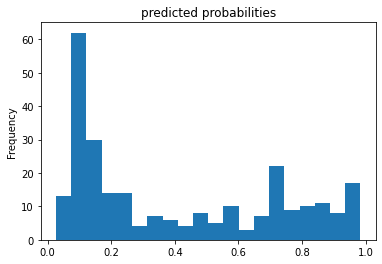

In [ ]:
pred_dicts = list(linear_est.predict(eval_input_fn))
print(pred_dicts)
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

This is the end of the linear regression algorithm on TensorFlow

# **Sources:**


1.   Chen, James. “Line Of Best Fit.” Investopedia, Investopedia, 29 Jan. 2020, www.investopedia.com/terms/l/line-of-best-fit.asp.
2. “Tf.feature_column.categorical_column_with_vocabulary_list.” TensorFlow, www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list?version=stable.
3. “Build a Linear Model with Estimators &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/estimator/linear.
4. Tim Russica "Tech with Tim" [Youtube](https://www.youtube.com/channel/UC4JX...)<br>[LinkedIn](https://www.linkedin.com/in/tim-ruscica/)


